In [1]:
import pandas as pd
import numpy as np

In [2]:
nino34_df = pd.read_excel('PALMOIL_NINO.xlsx', sheet_name = 'Nino3.4')

In [ ]:
nino34_df.head()

In [ ]:
list(nino34_df.columns.values)[1:]

In [3]:
nino34 = pd.melt(nino34_df, id_vars=['year'], value_vars=list(nino34_df.columns.values)[1:], var_name='month', value_name='nino34')

In [4]:
nino34.head()

,year,month,nino34
0,1950,1,24.55
1,1951,1,25.24
2,1952,1,26.67
3,1953,1,26.74
4,1954,1,26.98


In [5]:
nino34['DATE'] = pd.to_datetime(nino34[['year', 'month']].assign(DAY=1))

In [6]:
nino34.head()

,year,month,nino34,DATE
0,1950,1,24.55,1950-01-01
1,1951,1,25.24,1951-01-01
2,1952,1,26.67,1952-01-01
3,1953,1,26.74,1953-01-01
4,1954,1,26.98,1954-01-01


In [7]:
palm = pd.read_excel('PALMOIL_PRESENT.xlsx')

In [13]:
palm.rename(columns = {'기간(월)': 'DATE'}, inplace = True)
palm.head()

,DATE,평균가,전년동월평균가,전년도동월대비,등락률(%),종가,환산가($/ton)
0,2022-01-01,4857.00,3522.47,"▲ 1,334.53",37.89,4857.0,1165.88
1,2021-12-01,4632.82,3438.73,"▲ 1,194.09",34.72,4697.0,1109.26
2,2021-11-01,4903.86,3257.95,"▲ 1,645.91",50.52,4672.0,1156.97
3,2021-10-01,4911.41,2910.81,"▲ 2,000.60",68.73,4929.0,1182.21
4,2021-09-01,4379.61,2859.14,"▲ 1,520.47",53.18,4595.0,1046.57


In [8]:
nino34.sort_values(by='DATE', inplace=True)

In [9]:
nino34

,year,month,nino34,DATE
0,1950,1,24.55,1950-01-01
71,1950,2,25.06,1950-02-01
142,1950,3,25.87,1950-03-01
213,1950,4,26.28,1950-04-01
284,1950,5,26.18,1950-05-01
...,...,...,...,...
567,2020,8,26.26,2020-08-01
638,2020,9,25.89,2020-09-01
709,2020,10,25.46,2020-10-01
780,2020,11,25.28,2020-11-01


In [14]:
df = palm.merge(nino34, how='inner', on='DATE')

In [15]:
df.head()

,DATE,평균가,전년동월평균가,전년도동월대비,등락률(%),종가,환산가($/ton),year,month,nino34
0,2020-12-01,3438.73,2897.71,▲ 541.02,18.67,3600.0,851.81,2020,12,25.44
1,2020-11-01,3257.95,2622.68,▲ 635.27,24.22,3305.0,800.56,2020,11,25.28
2,2020-10-01,2910.81,2272.53,▲ 638.28,28.09,3011.0,700.30,2020,10,25.46
3,2020-09-01,2859.14,2192.94,▲ 666.20,30.38,2714.0,684.73,2020,9,25.89
4,2020-08-01,2701.63,2183.11,▲ 518.52,23.75,2738.0,647.48,2020,8,26.26


In [16]:
def cross_corr(x, y, lag):
    return x.corr(y.shift(periods=lag))

In [25]:
nino_palm = [cross_corr(df['nino34'], df['평균가'], lag=i) for i in range(11)]
nino_palm

[-0.544901121421203,
 -0.5851895652156084,
 -0.5815019304624124,
 -0.545632365829853,
 -0.47802645138319494,
 -0.37681087620846127,
 -0.26204160254804026,
 -0.14439761466421416,
 -0.0506343399633699,
 -0.009390825041121148,
 0.0017959896804405399]

In [19]:
import matplotlib.pyplot as plt

<AxesSubplot:label='dbe0cc38-f0a0-4cef-a2e0-65f1b3a1c766'>

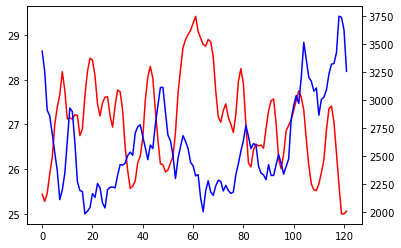

In [21]:
fig, ax = plt.subplots()
df.nino34.plot(ax=ax, style='r-')
df.평균가.plot(ax=ax, style='b-', secondary_y=True)

In [24]:
nino_palm = [cross_corr(df['nino34'], df['종가'], lag=i) for i in range(11)]
nino_palm

[-0.5612058945585172,
 -0.5807500079495339,
 -0.5695618858540661,
 -0.519196191778024,
 -0.4316160319618575,
 -0.3147479926567363,
 -0.19819704289064297,
 -0.08950424873641961,
 -0.0273672475813057,
 -0.007665532915514359,
 -0.010890362377058805]

<AxesSubplot:label='3822232b-4ff7-46c4-bf0e-d90770ba0b1c'>

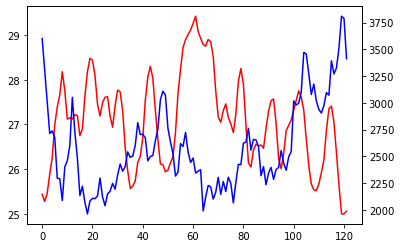

In [22]:
fig, ax = plt.subplots()
df.nino34.plot(ax=ax, style='r-')
df.종가.plot(ax=ax, style='b-', secondary_y=True)

# Random Forest Regression

In [39]:
x = df[['nino34']]
y = df['종가']

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
regressor = RandomForestRegressor()
regressor.fit(x, y)

RandomForestRegressor()

In [45]:
y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))

In [44]:
np.array([6.5]).reshape(1, 1)

array([[6.5]])

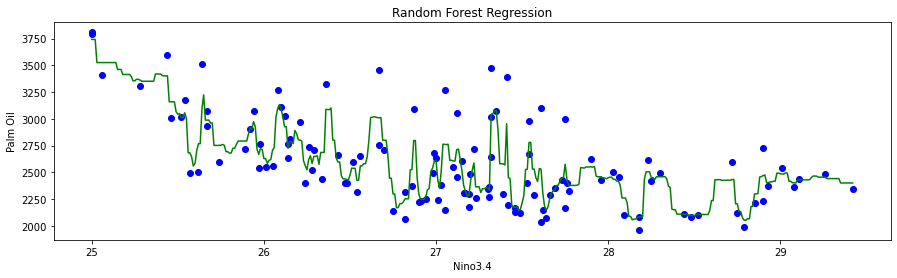

In [57]:
X_grid = np.arange(min(df['nino34']), max(df['nino34']), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'b') 
plt.plot(X_grid, regressor.predict(X_grid),color = 'green')
plt.rcParams["figure.figsize"] = (15,5)
plt.title('Random Forest Regression')
plt.xlabel('Nino3.4')
plt.ylabel('Palm Oil')
plt.show()